# Multi-armed Bandit Code Walkthrough - Epsilon Greedy

## Introduction

Pada bagian *walkthrough code* kali ini saya akan mengimplementasikan algoritma untuk menyelesaikan persoalan *multi-armed bandits* dengan metode *epsilon-greedy* untuk mencoba menyeimbangkan antara eksplorasi dan eksploitasi. 

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 

## The Bandits

Di sini kita akan menggunakan distribusi normal (Gaussian) dengan *sigma* = 1 (*variance*), *mean* = 0, dan 15 buah bandit.

In [8]:
n_bandits = 15

class multiArmedBandit: 
    def __init__(self):
        self.num_bandits = n_bandits
        self.arm_values = np.random.normal(0, 1, self.num_bandits) 
        self.K = np.zeros(self.num_bandits) #inisialisasi banyaknya aksi/tuas tersebut dipilih dengan nol
        self.est_values = np.zeros(self.num_bandits) #inisialisasi estimasi untuk masing-masing tuas (bandit)
        
    def get_reward(self, action): 
        # reward ditambah dengan Gaussian noise yang juga memiliki sigma = 1 dan mean =0
        noise = np.random.normal(0,1) 
        reward = self.arm_values[action] + noise 
        return reward 

    def choose_action(self, epsilon):
        # epsilon dari keseluruhan pemilihan akan menggunakan non-greedy actions, 
        # 1 - epsilon lainnya menggunakan greedy action
        rand_num = np.random.rand(1) 
        if epsilon>rand_num:
          return np.random.randint(self.num_bandits)
        else: 
          return np.argmax(self.est_values)

    def update_estimation(self, action, reward): 
        self.K[action] += 1 # mencatat sudah berapa kali aksi tersebut diambil
        alpha = 1./self.K[action] # step-size parameter
        self.est_values[action] += alpha * (reward - self.est_values[action]) # meng-update estimasi dengan nilai baru


## Experiment - 1

Kita telah membuat k buah bandit dengan reward pada masing-masing bandit terdistribusi normal. Untuk eksperimen kali ini saya akan mencoba untuk membuat semacam *scoreboard* untuk mencatat total *reward* yang didapatkan masing-masing tuas (bandit), kemudian membiarkan *agent* menebak kira-kira bandit manakah yang lebih menjanjikan?

In [9]:
def experiment_guess(bandit, Npulls, epsilon):
    i = 0
    total_reward = np.zeros(bandit.num_bandits) #menginisasi scoreboard dengan nol sejumlah bandit yang ada
    print 'Scoreboard awal :' + str(total_reward)
    print 'Nilai tuas(sebenarnya) : '
    print str(bandit.arm_values)
    for i in range(Npulls):
        action = bandit.choose_action(epsilon)
        total_reward[action] = bandit.get_reward(action)
        bandit.update_estimation(action, total_reward[action])
        if (i % 100) == 0:
            print "Mendapatkan reward untuk " + str(n_bandits) + " bandit :" 
            print str(total_reward)
        i+=1
        
    # agent menebak bandit mana yang lebih menjanjikan
    print "Agent menebak bandit ke "+ str(np.argmax(bandit.est_values)+1) + " lebih menjanjikan."

    if (np.argmax(bandit.est_values) == np.argmax(bandit.arm_values)):
        print "... dan itu benar!"
    else:
        print "... dan itu salah!"  

In [10]:
Nexperiments = 1 # banyaknya eksperimen yang dijalankan untuk tiap epsilon
Npulls = 2500 # banyaknya penarikan dalam satu kali eksperimen
#epsilon = 0,1

avg_outcome_eps0p1 = np.zeros(Npulls) # rata-rata reward untuk epsilon 0.1

for i in range(Nexperiments): 
   bandit = multiArmedBandit() 
   experiment_guess(bandit, Npulls, 0.1) 

Scoreboard awal :[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Nilai tuas(sebenarnya) : 
[ 0.03555238  0.52341045 -1.03114238 -1.04369813  0.18442987  1.16566869
  0.65563748 -1.63740889 -1.23656459  0.09902625 -0.70137377 -0.05125116
 -0.10064718 -0.3684139   0.72992125]
Mendapatkan reward untuk 15 bandit :
[ 2.69359464  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.        ]
Mendapatkan reward untuk 15 bandit :
[ 0.26038052  0.39731675  0.          0.          0.         -0.66621914
  0.         -1.46950313  0.         -0.71992903  0.         -0.12751178
  0.          0.          0.        ]
Mendapatkan reward untuk 15 bandit :
[ 0.94896176  0.17842809 -1.43065808  0.         -0.34066632  1.99187923
  0.         -1.46950313 -3.37220623 -0.71992903 -1.20575208 -1.47968136
 -0.90156089  0.         -0.55538469]
Mendapatkan reward untuk 15 bandit :
[ 0.94896176 -0.2448838  -1

## Experiment - 2

Mari kita coba modifikasi sedikit fungsi *experiment_guess* untuk menguji bagaimana *epsilon* memengaruhi eksplorasi pada algoritma ini, dengan mencoba menjalankan eksperimen dengan bagian kode di bawah ini:

In [11]:
def experiment(bandit, Npulls, epsilon):
    history = [] 
    for i in range(Npulls): 
        action = bandit.choose_action(epsilon)
        R = bandit.get_reward(action) 
        bandit.update_estimation(action,R) 
        history.append(R) 
    return np.array(history)

Nantinya, kita akan mencoba beberapa nilai epsilon. Untuk setiap nilai epsilon akan dijalankan beberapa kali eksperimen
yang terdiri dari sejumlah aksi penarikan tuas bandit-bandit. Kita akan terus mencatat hasil dari setiap eksperimen
dan membandingkan bagaimana hasil *reward* untuk setiap epsilon.

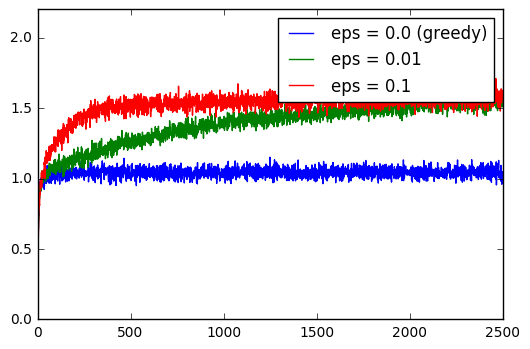

In [12]:
Nexperiments = 1000 # banyaknya eksperimen yang dijalankan untuk tiap epsilon
Npulls = 2500 # banyaknya penarikan dalam satu kali eksperimen

avg_outcome_eps0p0 = np.zeros(Npulls) # rata-rata reward untuk epsilon 0.0 (greedy)
avg_outcome_eps0p01 = np.zeros(Npulls) # rata-rata reward untuk epsilon 0.01
avg_outcome_eps0p1 = np.zeros(Npulls) # rata-rata reward untuk epsilon 0.1

for i in range(Nexperiments): 
   bandit_test1 = multiArmedBandit() 
   avg_outcome_eps0p0 += experiment(bandit_test1, Npulls, 0.0) 
   bandit_test2 = multiArmedBandit() 
   avg_outcome_eps0p01 += experiment(bandit_test2, Npulls, 0.01) 
   bandit_test3 = multiArmedBandit() 
   avg_outcome_eps0p1 += experiment(bandit_test3, Npulls,0.1) 

avg_outcome_eps0p0 /= np.float(Nexperiments) 
avg_outcome_eps0p01 /= np.float(Nexperiments) 
avg_outcome_eps0p1 /= np.float(Nexperiments) 

plt.plot(avg_outcome_eps0p0,label="eps = 0.0 (greedy)") 
plt.plot(avg_outcome_eps0p01,label="eps = 0.01") 
plt.plot(avg_outcome_eps0p1,label="eps = 0.1") 
plt.ylim(0,2.2) 
plt.legend() 
plt.show()

## What does that mean?

Setelah menjalankan 1000 eksperimen untuk tiap epsilon, kita mendapatkan grafik seperti di atas. 

Graf tersebut menunjukkan peningkatan dalam *reward* yang diterima sejalan dengan pengalaman yang dimiliki *agent*. Dapat kita lihat bahwa *greedy action* meningkat jauh lebih cepat dibandingkan dengan *non-greedy actions* (epsilon yang berbeda), artinya *reward* yang didapatkan sangat tinggi di awal (karena *immediate reward*) namun selama pengambilan aksi tetap berada pada level bawah pada grafik. Di setiap step hanya mendapatkan *reward* tertinggi 1, dibandingkan metode lain yang mencapai 1,55. Performanya 'semakin memburuk' dalam jangka panjang.

*epsilon-greedy* pada akhirnya memiliki kinerja yang jauh lebih baik karena melakukan eksplorasi dan perlahan-lahan mengenali aksi yang optimal. 


## Conclusion

Pheww. Simple yet powerful, eh?

Algoritma di atas terkadang memberikan hasil yang tidak optimal(pada eksperimen pertama). *Agent* seringkali tidak dapat memaksimalkan *Reward*, namun selalu dapat menebak dengan benar tuas mana yang memberikan *reward* tertinggi.
